## Problem Statement: 

LOANS are the major requirement of the modern world. By this only, Banks get a major part of the total profit. It is 
beneficial for students to manage their education and living expenses, and for people to buy any kind of luxury like houses, 
cars, etc. But when it comes to deciding whether the applicant’s profile is relevant to be granted with loan or not. 
Banks have to look after many aspects.	We are going to develop one such model that can predict whether a person will get 
his/her loan approved or not by using some of the background information of the applicant like the applicant’s gender, marital 
status, income, etc.


## Features and its Information:

1) Loan_ID: A unique identifier for each loan application. It doesn't contribute to the decision-making process but can be useful for record-keeping.

2) Gender: Lending institutions might consider gender as a factor in loan approval, depending on historical data or institutional policies. For instance, if there's evidence of gender-based discrimination, it could affect loan approval.

3) Married: Married individuals may be perceived as more financially stable and responsible. Lenders might be more inclined to approve loans for married applicants.

4) Dependents: The number of dependents could influence loan approval, as more dependents might mean higher financial responsibilities. Lenders may assess the applicant's ability to repay the loan considering their family size.

5) Education: The level of education might be a proxy for the applicant's earning potential and financial stability. Graduates may be perceived as having better job prospects and, consequently, higher repayment capabilities.

6) Self_Employed: Self-employed individuals may face different income patterns compared to salaried individuals. Lenders might scrutinize the stability of self-employed applicants' income sources.

7) ApplicantIncome: Higher income generally indicates a better ability to repay a loan. However, extremely high or low incomes might be red flags. Lenders may set income thresholds for loan approval.

8) CoapplicantIncome: The income of the coapplicant can supplement the household income, affecting the overall repayment capacity. A higher coapplicant income may positively influence loan approval.

9) LoanAmount: The amount of the loan applied for is crucial. Lenders will assess whether the requested loan amount aligns with the applicant's income and financial situation.

10) Loan_Amount_Term: The term of the loan affects monthly repayment amounts. Shorter terms might indicate a quicker repayment ability, while longer terms might be associated with higher overall interest payments.

11) Credit_History: This is likely one of the most critical factors. A good credit history (1.0) is generally associated with a higher likelihood of loan approval. Lenders heavily rely on credit history to assess risk.

12) Property_Area: The location of the property can influence loan approval. Urban areas might have different risk profiles than rural areas, and lenders may have specific criteria for different regions.

13) Loan_Status: indicating whether the loan was approved or not






In [2]:
# Install the libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing the dataset:

df=pd.read_csv('Dataset.csv')

In [6]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [8]:
# dimension
df.shape

(614, 13)

In [9]:
df.columns  # returns all the features in a dataset

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
df.info()  # returns datatype, null count and information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# 1) Data Cleaning

In [12]:
df.isnull().sum()  # returns total no.of missing values in each feature

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
# categorical features :
categorical_features = df.select_dtypes(include='object').columns.tolist()
print('categorical features are :',categorical_features )

categorical features are : ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [17]:
# numerical features:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print('numerical features are :',numeric_features )

numerical features are : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


<Axes: >

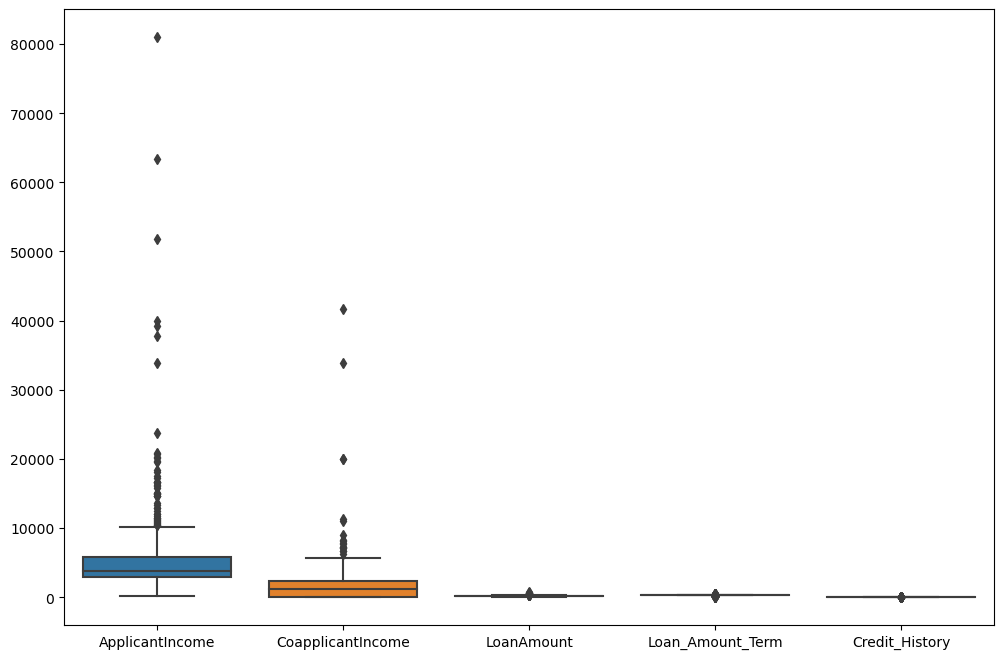

In [20]:
# checking the outliers only for numeric values

plt.figure(figsize=(12,8))
sns.boxplot(data=df)

In [26]:
# filling the null values in numeric features with "mode" because it ios not sensitive to outliers but mean is sensitive.

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [24]:
df['LoanAmount'].median()

128.0

In [25]:
df['LoanAmount'].mean()

146.41216216216216

In [30]:
# Filling the null values of object datatype:

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [29]:
# df['Gender'].mode() # it returns two values 1 is index and 2 is value so we need only value so fillna takes only one value.
df['Gender'].mode()[0]

'Male'

In [31]:
# cheking whether any null values are present after filling

df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [33]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# 2) Exploratory Data Analysis

Number of peoples who took loan by gender
Male      502
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

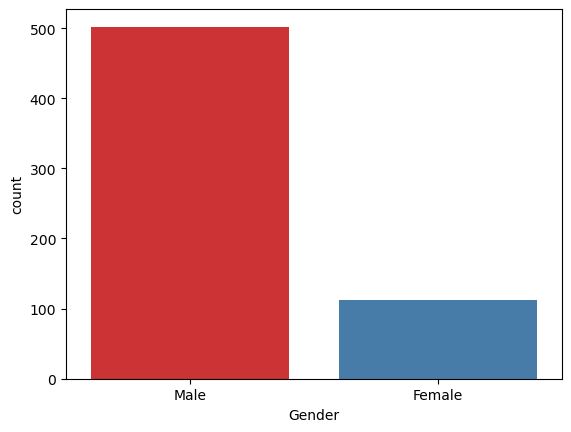

In [36]:
print('Number of peoples who took loan by gender')
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data=df, palette ='Set1')

Number of peoples who took loan based on marriage
Yes    401
No     213
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

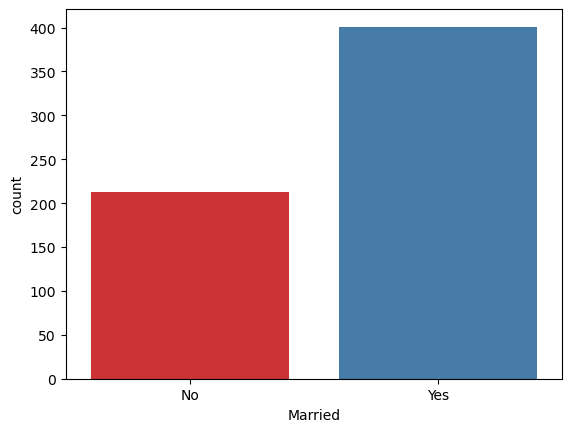

In [37]:
print('Number of peoples who took loan based on marriage')
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df, palette ='Set1')

Number of peoples who took loan by Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

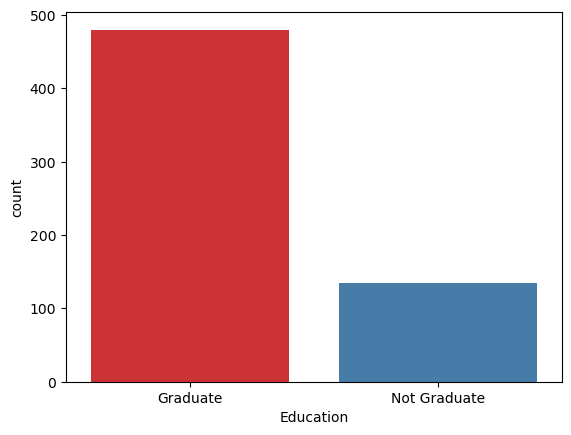

In [38]:
print('Number of peoples who took loan by Education')
print(df['Education'].value_counts())
sns.countplot(x='Education',data=df, palette ='Set1')

<Axes: >

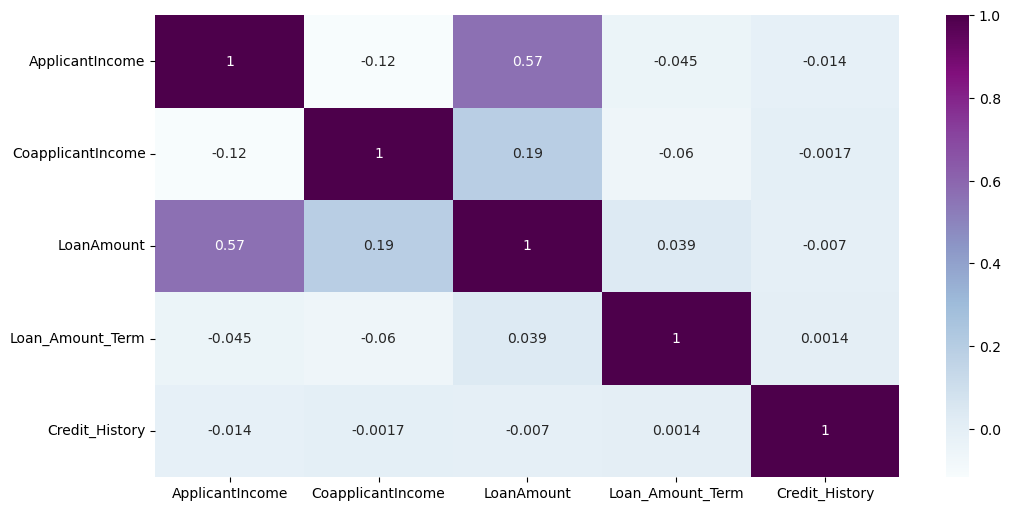

In [42]:
# correlation of features

corr = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot = True, cmap ='BuPu')

In [39]:
corr = df.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059675,-0.001665
LoanAmount,0.565181,0.189218,1.000000,0.039235,-0.007031
Loan_Amount_Term,-0.045242,-0.059675,0.039235,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007031,0.001395,1.000000


In [45]:
# calculating total aplicant income by sum of applicant income and coapplicant income

df['Total_Applicant_Income'] = df['ApplicantIncome']+df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


# 3) Feature Engineering

<Axes: xlabel='ApplicantIncome_log', ylabel='Density'>

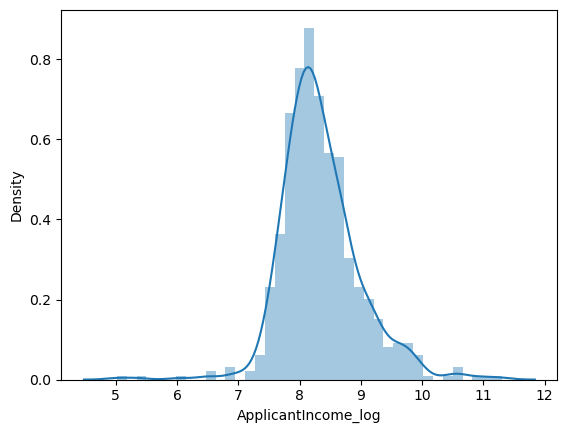

In [46]:
# apply log transformation Normalization

df['ApplicantIncome_log'] = np.log(df['ApplicantIncome']+1)
sns.distplot(df['ApplicantIncome_log'])

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

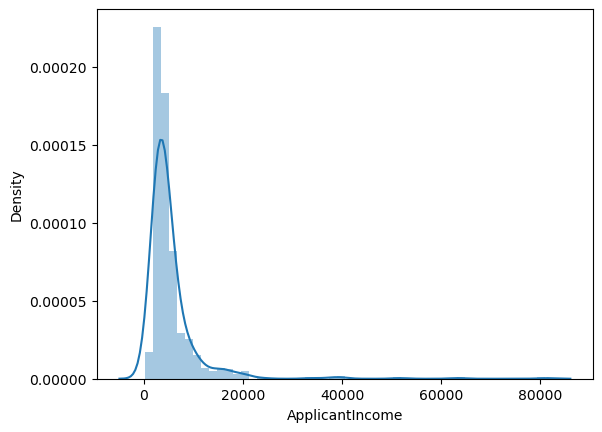

In [47]:
sns.distplot(df['ApplicantIncome'])

In [48]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income,ApplicantIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681


<Axes: xlabel='loanamount_log', ylabel='Density'>

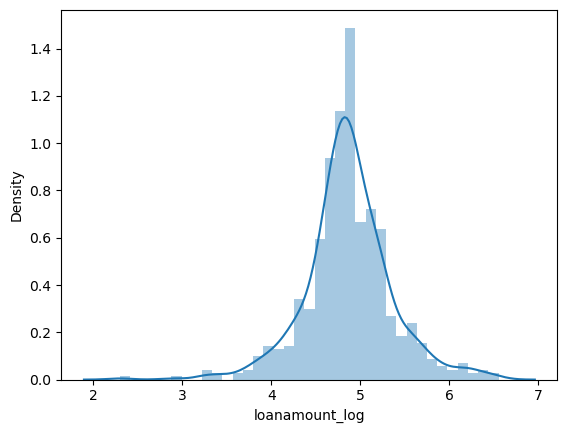

In [49]:
df['loanamount_log'] = np.log(df['LoanAmount']+1)
sns.distplot(df['loanamount_log'])

<Axes: xlabel='LoanAmount', ylabel='Density'>

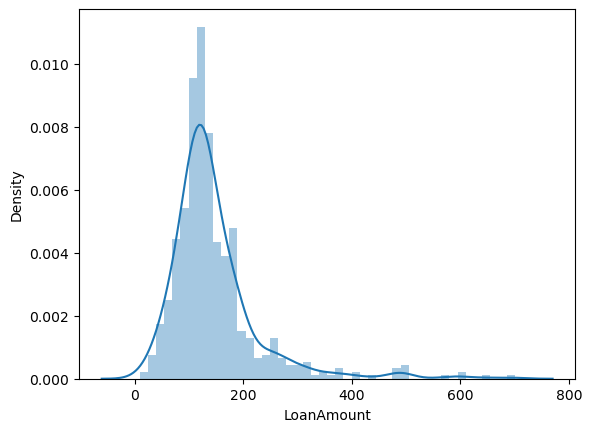

In [50]:
sns.distplot(df['LoanAmount'])

<Axes: xlabel='loanamountterm_log', ylabel='Density'>

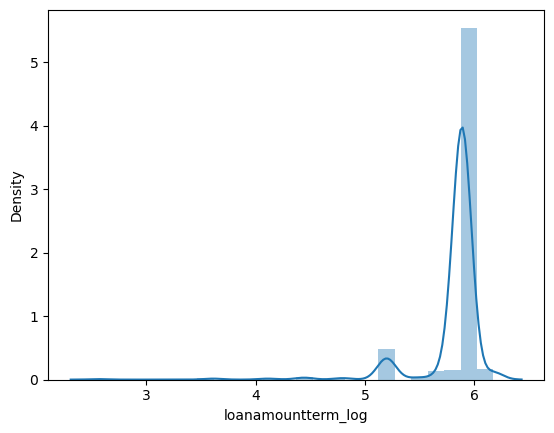

In [51]:
df['loanamountterm_log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df['loanamountterm_log'])

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

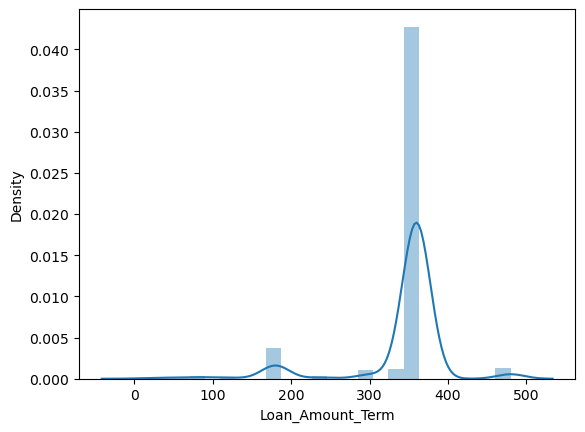

In [53]:
sns.distplot(df['Loan_Amount_Term'])

<Axes: xlabel='total_applicant_income_log', ylabel='Density'>

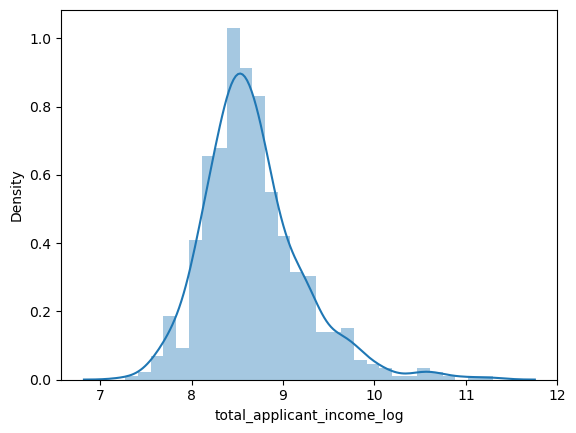

In [54]:
df['total_applicant_income_log'] = np.log(df['Total_Applicant_Income']+1)
sns.distplot(df['total_applicant_income_log'])

In [55]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income,ApplicantIncome_log,loanamount_log,loanamountterm_log,total_applicant_income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878,8.699681


In [56]:
# drop unnecessary columns

cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Applicant_Income','Loan_ID']

df=df.drop(columns = cols, axis = 1)

df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,loanamount_log,loanamountterm_log,total_applicant_income_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [58]:
# encoding techniques: 1_label encoding and 2_ onehot encoding

from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status']
labelencoding = LabelEncoder()

for col in cols:
    df[col] = labelencoding.fit_transform(df[col])

In [59]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,loanamount_log,loanamountterm_log,total_applicant_income_log
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


In [60]:
df.dtypes

Gender                          int32
Married                         int32
Dependents                      int32
Education                       int32
Self_Employed                   int32
Credit_History                float64
Property_Area                   int32
Loan_Status                     int32
ApplicantIncome_log           float64
loanamount_log                float64
loanamountterm_log            float64
total_applicant_income_log    float64
dtype: object

In [62]:
## split independent and dependent features

X = df.drop(columns = ['Loan_Status'], axis=1)

y = df['Loan_Status']

In [64]:
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome_log,loanamount_log,loanamountterm_log,total_applicant_income_log
0,1,0,0,0,0,1.0,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,7.972811,4.276666,5.888878,7.972811
610,1,1,3,0,0,1.0,0,8.320448,3.713572,5.198497,8.320448
611,1,1,1,0,0,1.0,2,8.996280,5.537334,5.888878,9.025576
612,1,1,2,0,0,1.0,2,8.933796,5.236442,5.888878,8.933796


In [65]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

# 4) Data Splitting

In [67]:
## importing the machine learning libraries

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [68]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=42)

# 5) Model Selection and Training

### 1) Logistic Regression 

In [81]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred_model1 = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_model1)

In [71]:
print("accuracy", accuracy*100) 

## the ratio of the correctly predicted values to the total values

accuracy 77.27272727272727


In [72]:
score=cross_val_score(model1,X,y, cv=5)
score

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

In [73]:
np.mean(score)*100

80.9462881514061

### 2) Decision Tree Classifier

In [82]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
y_pred_model2 = model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_model2)
print('accuracy score of decision tree classifier',accuracy*100)

accuracy score of decision tree classifier 71.42857142857143


In [75]:
score=cross_val_score(model2,X,y, cv=5)
print('cross validation score for decision tree classifier', np.mean(score)*100)

cross validation score for decision tree classifier 70.68372650939624


### 3) Random forest Classifier

In [83]:
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)
y_pred_model3 = model3.predict(X_test)
accuracy = accuracy_score(y_pred_model3, y_test)
print('accuracy score of Random forest classifier',accuracy*100)

accuracy score of Random forest classifier 74.67532467532467


### 4) K neighbor 

In [86]:
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_train, y_train)
y_pred_model4 = model4.predict(X_test)
accuracy = accuracy_score(y_pred_model4, y_test)
print('accuracy score of k neighbor classifier',accuracy*100)

accuracy score of k neighbor classifier 71.42857142857143


In [85]:
score=cross_val_score(model4,X,y, cv=5)
print('cross validation score k neighbor classifier', np.mean(score)*100)

cross validation score k neighbor classifier 73.61721977875517


# 6) Model Evaluation

In [89]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name, y_test, y_pred):
    report = classification_report(y_test, y_pred)
    print(f"classification report for {model_name}: \n{report}\n")
    
generate_classification_report(model1,y_test, y_pred_model1)
generate_classification_report(model2,y_test, y_pred_model2)
generate_classification_report(model3,y_test, y_pred_model3)
generate_classification_report(model4,y_test, y_pred_model4)

classification report for LogisticRegression(): 
              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154


classification report for DecisionTreeClassifier(): 
              precision    recall  f1-score   support

           0       0.60      0.54      0.57        54
           1       0.76      0.81      0.79       100

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.68       154
weighted avg       0.71      0.71      0.71       154


classification report for RandomForestClassifier(): 
              precision    recall  f1-score   support

           0       0.74      0.43      0.54        54
           1       0.75      0.92      0.83       100

    accuracy             

In [90]:
df['Loan_Status'].value_counts() # imbalance dataset

1    422
0    192
Name: Loan_Status, dtype: int64

In [91]:
pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 235.6/235.6 kB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [92]:
from imblearn.over_sampling import RandomOverSampler

In [94]:
oversample = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversample.fit_resample(X,y)

df_resampled = pd.concat([pd.DataFrame(X_resampled,columns=X.columns),pd.Series(y_resampled,name='Loan_status')],axis=1)

In [95]:
df_resampled

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome_log,loanamount_log,loanamountterm_log,total_applicant_income_log,Loan_status
0,1,0,0,0,0,1.000000,2,8.674197,4.859812,5.888878,8.674197,1
1,1,1,1,0,0,1.000000,0,8.430327,4.859812,5.888878,8.714732,0
2,1,1,0,0,1,1.000000,2,8.006701,4.204693,5.888878,8.006701,1
3,1,1,0,1,0,1.000000,2,7.857094,4.795791,5.888878,8.505525,1
4,1,0,0,0,0,1.000000,2,8.699681,4.955827,5.888878,8.699681,1
...,...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,3,1,0,1.000000,2,8.292298,4.859812,5.198497,8.292298,0
840,1,1,1,0,0,0.842199,0,7.539559,4.127134,5.888878,7.539559,0
841,1,1,1,0,0,0.000000,0,7.933080,4.990433,5.888878,8.456381,0
842,1,1,2,1,0,0.000000,2,7.969012,3.828641,5.198497,7.969012,0


In [99]:
X_resampled

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome_log,loanamount_log,loanamountterm_log,total_applicant_income_log
0,1,0,0,0,0,1.000000,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.000000,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.000000,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.000000,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.000000,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,3,1,0,1.000000,2,8.292298,4.859812,5.198497,8.292298
840,1,1,1,0,0,0.842199,0,7.539559,4.127134,5.888878,7.539559
841,1,1,1,0,0,0.000000,0,7.933080,4.990433,5.888878,8.456381
842,1,1,2,1,0,0.000000,2,7.969012,3.828641,5.198497,7.969012


In [97]:
y_resampled.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [102]:
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [104]:
model1 = LogisticRegression()
model1.fit(X_resampled_train, y_resampled_train)
y_pred_model1 = model1.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test, y_pred_model1)
accuracy*100

69.66824644549763

In [105]:
model2 = DecisionTreeClassifier()
model2.fit(X_resampled_train, y_resampled_train)
y_pred_model2 = model2.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test, y_pred_model2)
print('accuracy score of decision tree classifier',accuracy*100)


accuracy score of decision tree classifier 78.67298578199052


In [106]:
model3 = RandomForestClassifier()
model3.fit(X_resampled_train, y_resampled_train)
y_pred_model3 = model3.predict(X_resampled_test)
accuracy = accuracy_score(y_pred_model3, y_resampled_test)
print('accuracy score of Random forest classifier',accuracy*100)

accuracy score of Random forest classifier 86.7298578199052


In [107]:
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_resampled_train, y_resampled_train)
y_pred_model4 = model4.predict(X_resampled_test)
accuracy = accuracy_score(y_pred_model4, y_resampled_test)
print('accuracy score of k neighbor classifier',accuracy*100)

accuracy score of k neighbor classifier 72.51184834123224


In [108]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name, y_test, y_pred):
    report = classification_report(y_test, y_pred)
    print(f"classification report for {model_name}: \n{report}\n")
    
generate_classification_report(model1,y_resampled_test, y_pred_model1)
generate_classification_report(model2,y_resampled_test, y_pred_model2)
generate_classification_report(model3,y_resampled_test, y_pred_model3)
generate_classification_report(model4,y_resampled_test, y_pred_model4)

classification report for LogisticRegression(): 
              precision    recall  f1-score   support

           0       0.85      0.54      0.66       114
           1       0.62      0.89      0.73        97

    accuracy                           0.70       211
   macro avg       0.73      0.71      0.69       211
weighted avg       0.74      0.70      0.69       211


classification report for DecisionTreeClassifier(): 
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       114
           1       0.81      0.70      0.75        97

    accuracy                           0.79       211
   macro avg       0.79      0.78      0.78       211
weighted avg       0.79      0.79      0.78       211


classification report for RandomForestClassifier(): 
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       114
           1       0.84      0.88      0.86        97

    accuracy             